#                                      Q3






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv(r'/content/drive/MyDrive/ML Data/ionosphere_data_kaggle.csv')
# df.iloc[:,:-1]

In [ ]:
mean=[]
for i in range(df.shape[1]-1):
    mean.append(df.iloc[:,i].mean())
print("mean for all fatures -> ",mean)


mean for all fatures ->  [0.8917378917378918, 0.0, 0.6413418518518518, 0.044371880341880325, 0.6010678917378914, 0.11588900284900286, 0.5500950712250714, 0.11936037037037031, 0.5118480911680916, 0.18134538461538463, 0.4761826495726494, 0.15504045584045584, 0.40080119658119673, 0.09341367521367518, 0.3441591452991455, 0.07113233618233616, 0.3819490028490032, -0.0036168091168091118, 0.3593896011396012, -0.02402470085470082, 0.3366954700854702, 0.00829589743589745, 0.3624754985754988, -0.05740575498575496, 0.3961346723646723, -0.0711868660968661, 0.5416407977207977, -0.06953760683760678, 0.37844518518518494, -0.027907094017094042, 0.3525137321937323, -0.0037937606837606867, 0.3493636467236467, 0.014480113960113962]


In [ ]:
var=[]
for i in range(df.shape[1]-1):
    var.append(df.iloc[:,i].var())
print("var for all features -> ",var)

var for all features ->  [0.09681725681725628, 0.0, 0.24771345485570315, 0.19486466487188267, 0.2702559931269707, 0.21234597498443147, 0.24270773821935185, 0.2711804539327196, 0.25711544852920304, 0.2341116820757799, 0.3175281498903879, 0.24484430799179177, 0.38711557295113525, 0.2448989306404539, 0.4261841785238393, 0.21010367322938403, 0.3819491582118602, 0.24677246800578923, 0.3922101169781265, 0.26943998908269623, 0.37189058312542134, 0.26849588626654974, 0.3645351815505356, 0.2782101681387858, 0.3346054292735349, 0.25856665689529384, 0.2664672565559332, 0.3025277676902566, 0.3316441766616093, 0.25803768508124514, 0.32659324440517357, 0.2637586240081025, 0.273177001290092, 0.2193397545617011]


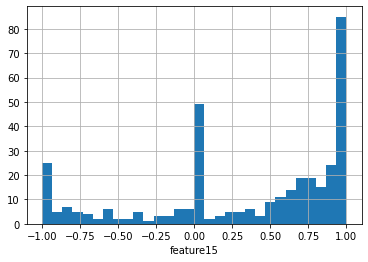

<Figure size 720x720 with 0 Axes>

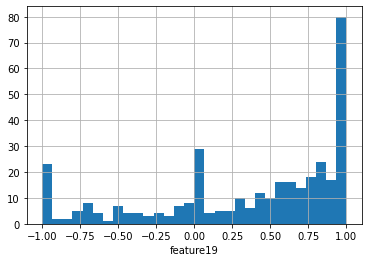

<Figure size 720x720 with 0 Axes>

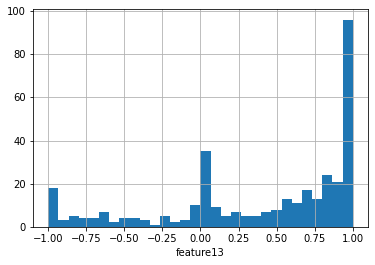

<Figure size 720x720 with 0 Axes>

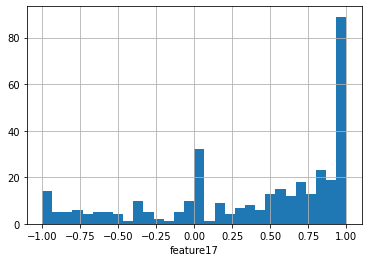

<Figure size 720x720 with 0 Axes>

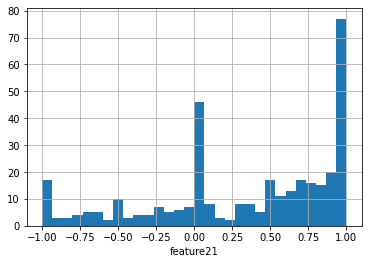

<Figure size 720x720 with 0 Axes>

In [ ]:
# sorting the dataframe by their feature variance in descending order
sorted_df=df.reindex(df.iloc[:,:-1].var().sort_values(ascending=False).index, axis=1)

#plotting histogram for top 5 variances
for i in range(5):
    sorted_df.iloc[:,i].hist(bins=30)
    plt.xlabel(sorted_df.iloc[:,i].name)
    plt.figure(figsize=(10,10))
    plt.show()
    








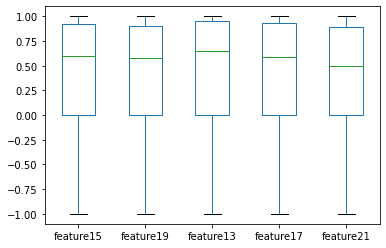

In [ ]:
sorted_df.iloc[:,:5].boxplot(grid = False)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.1,shuffle=True)
train_x=np.array(train_x)
train_y=np.array(train_y)
test_x=np.array(test_x)
test_y=np.array(test_y)

#standardizing test & data set
stand = StandardScaler().fit(train_x)
train_x = stand.transform(train_x)
test_x = stand.transform(test_x)

k = 5
kf = KFold(n_splits=k, random_state=42, shuffle=True)


### Q3.1 a

In [ ]:
# from sklearn.decomposition import PCA

# var=np.arange(0.9,1.01,0.01)
# for i in var:
#   print(i)
#   pca=PCA(i)
#   pca.fit(train_x)
#   p_train_x=pca.transform(train_x)
#   print(p_train_x.shape)
  

###                                                Q3.1. b

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


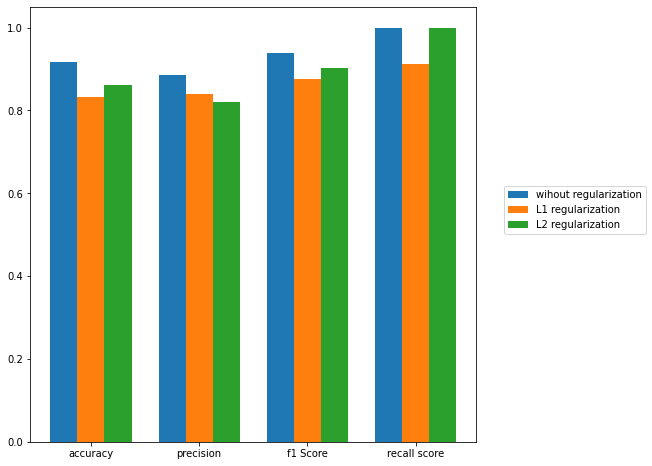

None

In [ ]:

acc_score=0
for train_idx,val_idx in kf.split(train_x):
    x_train , x_val = train_x[train_idx,:],train_x[val_idx,:]
    y_train , y_val = train_y[train_idx] , train_y[val_idx]
   
    model= LogisticRegression(penalty="none",solver="saga")
    model.fit(x_train,y_train)
    score=model.score(x_val,y_val)
    if(score > acc_score):
        model1= model
        acc_score=score

acc_score=0
for train_idx,val_idx in kf.split(train_x):
    x_train , x_val = train_x[train_idx,:],train_x[val_idx,:]
    y_train , y_val = train_y[train_idx] , train_y[val_idx]
    
    model= LogisticRegression(penalty="l1",solver="liblinear",C=0.1)
    model.fit(x_train,y_train)
    score=model.score(x_val,y_val)
    if(score > acc_score):
        model2= model
        acc_score=score      


acc_score=0
for train_idx,val_idx in kf.split(train_x):
    x_train , x_val = train_x[train_idx,:],train_x[val_idx,:]
    y_train , y_val = train_y[train_idx] , train_y[val_idx]
    
    model= LogisticRegression(penalty="l2",C=0.1)
    model.fit(x_train,y_train)
    score=model.score(x_val,y_val)
    if(score > acc_score):
        model3= model
        acc_score=score

x=["accuracy","precision","f1 Score","recall score"]
x_axis=np.arange(len(x))

plt.figure(figsize=(8,8))
pred=model1.predict(test_x)
score=[]
score.append(accuracy_score(test_y,pred))
score.append(precision_score(test_y,pred,pos_label="g"))
score.append(f1_score(test_y,pred,pos_label="g"))
score.append(recall_score(test_y,pred,pos_label="g"))
plt.bar(x_axis-0.25,score,0.25,label="wihout regularization")

pred=model2.predict(test_x)
score=[]
score.append(accuracy_score(test_y,pred))
score.append(precision_score(test_y,pred,pos_label="g"))
score.append(f1_score(test_y,pred,pos_label="g"))
score.append(recall_score(test_y,pred,pos_label="g"))
plt.bar(x_axis,score,0.25,label="L1 regularization")

pred=model3.predict(test_x)
score=[]
score.append(accuracy_score(test_y,pred))
score.append(precision_score(test_y,pred,pos_label="g"))
score.append(f1_score(test_y,pred,pos_label="g"))
score.append(recall_score(test_y,pred,pos_label="g"))
plt.bar(x_axis+0.25,score,0.25,label="L2 regularization")

plt.xticks(x_axis,x)
plt.legend(bbox_to_anchor = (1.05, 0.6))
display(plt.show())



    

###         Q3.1. c

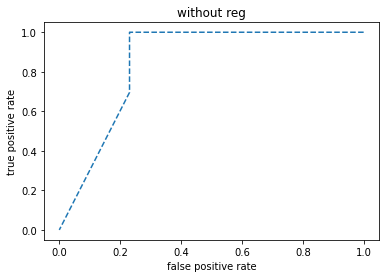

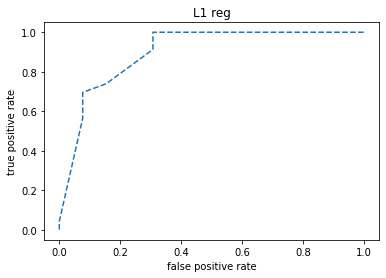

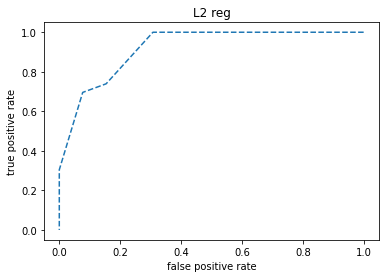

In [ ]:

def rates(th,y):
    true_pos=0
    false_neg=0
    false_pos=0
    true_neg=0
    for i in range(len(th)):
        if th[i]==1 and y[i]=="g":
            true_pos+=1
        elif th[i]==0 and y[i]=="g":
            false_neg+=1
        elif th[i]==1 and y[i]=="b":
            false_pos+=1
        else:
            true_neg+=1
#     print("tp=",true_pos)
#     print("tn=",true_neg)
#     print("fp=",false_pos)
#     print("fn=",false_neg)

    # to avoid zero division error
    if true_pos+false_neg==0 :
        tpr=0
    else:
        tpr= true_pos/(true_pos + false_neg)
    if false_pos + true_neg==0:
        fpr=0
    else:
        fpr= false_pos / (false_pos + true_neg)
    return tpr,fpr

def roc(prob,y,num_th):
    roc=[]
    thresholds=np.arange(0,1+(1/num_th),1/num_th)
    for th in thresholds:
        arr=np.greater(prob,th).astype(int)
#         print("for threshold=",th," -->",arr)
#         print("y-->",y)
        tpr,fpr= rates(arr,y)
        roc.append([tpr,fpr])
        
    return roc
        
#roc for LogR whithout  
prob_vector=model1.predict_proba(test_x)
roc_data=np.array(roc(prob_vector[:,1],test_y,10))
plt.plot(roc_data[:,1], roc_data[:,0], linestyle='--')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("without reg")
plt.show()

#roc for L1 reg
prob_vector=model2.predict_proba(test_x)
roc_data=np.array(roc(prob_vector[:,1],test_y,10))
plt.plot(roc_data[:,1], roc_data[:,0], linestyle='--')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("L1 reg")
plt.show()

#roc for L2 reg
prob_vector=model3.predict_proba(test_x)
roc_data=np.array(roc(prob_vector[:,1],test_y,10))
plt.plot(roc_data[:,1], roc_data[:,0], linestyle='--')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("L2 reg")
plt.show()

        



###                                                    Q3.1. d

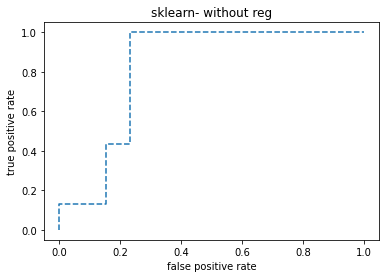

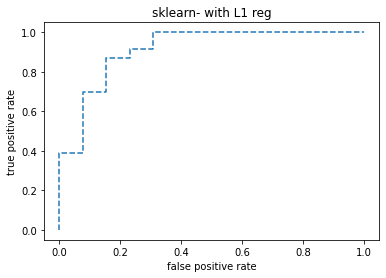

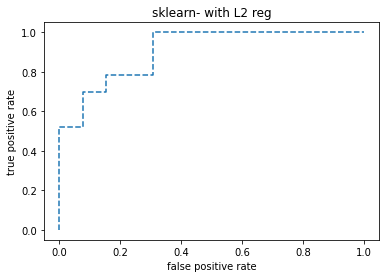

In [ ]:
from sklearn.metrics import roc_curve

# witohut reg
fpr,tpr,thresholds= roc_curve(test_y,model1.predict_proba(test_x)[:,1],pos_label="g")
plt.plot(fpr,tpr,linestyle="--")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("sklearn- without reg")
plt.show()

# with L1
fpr,tpr,thresholds= roc_curve(test_y,model2.predict_proba(test_x)[:,1],pos_label="g")
plt.plot(fpr,tpr,linestyle="--")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("sklearn- with L1 reg")
plt.show()

# with L2
fpr,tpr,thresholds= roc_curve(test_y,model3.predict_proba(test_x)[:,1],pos_label="g")
plt.plot(fpr,tpr,linestyle="--")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("sklearn- with L2 reg")
plt.show()

###   **Q3.2**







In [ ]:

from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
import idx2numpy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

train_x_3D = idx2numpy.convert_from_file(r'/content/drive/MyDrive/ML Data/train-images.idx3-ubyte')
train_x=train_x_3D.flatten().reshape(60000,784)
train_y= idx2numpy.convert_from_file(r'/content/drive/MyDrive/ML Data/train-labels.idx1-ubyte')

test_x_3D = idx2numpy.convert_from_file(r'/content/drive/MyDrive/ML Data/t10k-images.idx3-ubyte')
test_x=test_x_3D.flatten().reshape(10000,784)
test_y= idx2numpy.convert_from_file(r'/content/drive/MyDrive/ML Data/t10k-labels.idx1-ubyte')

#normalization
norm = MinMaxScaler().fit(train_x)
x_train_norm = norm.transform(train_x)
x_test_norm = norm.transform(test_x) 


model=OneVsOneClassifier(LogisticRegression(penalty="none")).fit(x_train_norm,train_y)
pred=model.predict(x_test_norm)
print("OVO Logistic Regression without regularization")
print(classification_report(test_y,pred,digits=4))

model=OneVsOneClassifier(LogisticRegression(penalty="l2",C=0.01)).fit(x_train_norm,train_y)
pred=model.predict(x_test_norm)
print("OVO Logistic Regression with L2 regularization")
print(classification_report(test_y,pred,digits=4))

model=OneVsRestClassifier(LogisticRegression(penalty="none")).fit(x_train_norm,train_y)
pred=model.predict(x_test_norm)
print("OVR Logistic Regression without regularization")
print(classification_report(test_y,pred,digits=4))

model=OneVsRestClassifier(LogisticRegression(penalty="l2",C=0.01)).fit(x_train_norm,train_y)
pred=model.predict(x_test_norm)
print("OVR Logistic Regression with L2 regularization")
print(classification_report(test_y,pred,digits=4))







OVO Logistic Regression without regularization
              precision    recall  f1-score   support

           0     0.9596    0.9684    0.9639       980
           1     0.9763    0.9797    0.9780      1135
           2     0.9175    0.9157    0.9166      1032
           3     0.9127    0.9208    0.9167      1010
           4     0.9255    0.9491    0.9372       982
           5     0.8950    0.8700    0.8823       892
           6     0.9483    0.9374    0.9428       958
           7     0.9390    0.9280    0.9335      1028
           8     0.8761    0.9076    0.8916       974
           9     0.9304    0.9009    0.9154      1009

    accuracy                         0.9289     10000
   macro avg     0.9280    0.9278    0.9278     10000
weighted avg     0.9290    0.9289    0.9289     10000

OVO Logistic Regression with L2 regularization
              precision    recall  f1-score   support

           0     0.9602    0.9837    0.9718       980
           1     0.9588    0.9833    0